In [1]:
%matplotlib notebook
import csv
from scipy.spatial.transform import Rotation as R
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

file = "video_log_labels/participant_video_csvs/9-23-2020-Furhat__5455.csv"
fileTimings = "video_log_labels/5455_gazetargets.txt"

# file = "video_log_labels/participant_video_csvs/9-18-2020-Furhat__4041.csv"
# fileTimings = "video_log_labels/4041_gazetargets.txt"

anglesLeft = []
anglesRight = []

with open(file, newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
     for row in spamreader:
         anglesLeft.append([row[i] for i in [1,2,3]])
         anglesRight.append([row[i] for i in [1,4,5]])

timingsToTargetLeft = []
timingsToTargetRight = []
with open(fileTimings, newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
     for row in spamreader:
        print(row)
        if row[0].find("Left") != -1:
            timingsToTargetLeft.append([row[i] for i in [3,6,11]])
        else:
            timingsToTargetRight.append([row[i] for i in [3,6,11]])

['GazeOfLeft', '', '00:00:26.411', '26.411', '00:00:26:10', '00:00:26.745', '26.745', '00:00:26:18', '00:00:00.334', '0.334', '00:00:00:08', 'Robot', '(-51,-45)']
['GazeOfLeft', '', '00:00:27.470', '27.47', '00:00:27:11', '00:00:28.431', '28.431', '00:00:28:10', '00:00:00.961', '0.961', '00:00:00:24', 'Other', '(-49,-57)']
['GazeOfLeft', '', '00:00:38.685', '38.685', '00:00:38:17', '00:00:41.666', '41.666', '00:00:41:16', '00:00:02.981', '2.981', '00:00:02:24', 'Robot', '(-51,-56)']
['GazeOfLeft', '', '00:02:38.978', '158.978', '00:02:38:24', '00:02:40.077', '160.077', '00:02:40:01', '00:00:01.099', '1.099', '00:00:01:02', 'Tablet', '(-53,-56)']
['GazeOfLeft', '', '00:11:49.970', '709.97', '00:11:49:24', '00:11:50.892', '710.892', '00:11:50:22', '00:00:00.922', '0.922', '00:00:00:23', 'Other', '(-47,-55)']
['GazeOfLeft', '', '00:11:54.402', '714.402', '00:11:54:10', '00:11:56.519', '716.519', '00:11:56:12', '00:00:02.117', '2.117', '00:00:02:02', 'Tablet', '(-50,-54)']
['GazeOfLeft', '

In [2]:
def angleToPointOnCircle(angle, radius=1, origin=[0,0]):
    #r = R.from_euler('zyx', [
    #[0, 0, angle[0]],
    #[0, angle[1], 0],
    #[0, 0, 0]], degrees=True)
    yaw = float(angle[1])*0.0174533
    roll = 0
    pitch = float(angle[2])*0.0174533
    yawMatrix = np.matrix([
    [math.cos(yaw), -math.sin(yaw), 0],
    [math.sin(yaw), math.cos(yaw), 0],
    [0, 0, 1]
    ])

    pitchMatrix = np.matrix([
    [math.cos(pitch), 0, math.sin(pitch)],
    [0, 1, 0],
    [-math.sin(pitch), 0, math.cos(pitch)]
    ])

    rollMatrix = np.matrix([
    [1, 0, 0],
    [0, math.cos(roll), -math.sin(roll)],
    [0, math.sin(roll), math.cos(roll)]
    ])

    R = yawMatrix * pitchMatrix * rollMatrix
    vector = np.array([[radius], [0], [0]])
    return R*vector

def convertListAngleToListPoint(angles):
    angleToPoint = []
    for angle in angles:
        angleResult = angleToPointOnCircle(angle)
        angleToPoint.append(angleResult)
    return np.array(angleToPoint)

def findPointsToTarget(angles, listOfTargets, target):
    selectedTargets = [elem for elem in timingsToTargetLeft if elem[2]==target]
    listOfTargetAngles = []
    for elem in selectedTargets:
        for angle in angles:
            if float(angle[0]) >= float(elem[0]) and \
            float(angle[0]) <= float(elem[1]):
               listOfTargetAngles.append(angle)
    return convertListAngleToListPoint(listOfTargetAngles), listOfTargetAngles

left = convertListAngleToListPoint(anglesLeft[1:])
#otherLeft = np.array([left[27,:], left[709,:], left[718,:]])#convertListAngleToListPoint(OtherR)
otherLeft, targetAng = findPointsToTarget(anglesLeft[1:], timingsToTargetLeft, "Other")
#RobotR = [[-56,-53]]
#robotLeft = np.array([left[25,:], left[40,:]])#convertListAngleToListPoint(RobotR)
robotLeft, targetAng = findPointsToTarget(anglesLeft[1:], timingsToTargetLeft, "Robot")

#TabletR =[[-55,-51],[-54,-55], [-52,-54]]
#tabletLeft = np.array([left[159,:], left[715,:]])#convertListAngleToListPoint(TabletR)
tabletLeft, targetAng = findPointsToTarget(anglesLeft[1:], timingsToTargetLeft, "Tablet")

right = convertListAngleToListPoint(anglesRight[1:])

#OtherR=[[-57,-51], [-46,-48], [-53,-41]]
#otherRight = np.array([right[26,:], right[337,:], right[393,:], right[734,:]])#convertListAngleToListPoint(OtherR)
otherRight, tar = findPointsToTarget(anglesRight[1:], timingsToTargetRight, "Other")
print(otherRight)
#RobotR = [[-56,-53]]
#robotRight = np.array([right[25,:], right[40,:]])#convertListAngleToListPoint(RobotR)
robotRight, tar = findPointsToTarget(anglesRight[1:], timingsToTargetRight, "Robot")

#TabletR =[[-55,-51],[-54,-55], [-52,-54]]
#tabletRight = np.array([right[159,:], right[393,:], right[715,:]])#convertListAngleToListPoint(TabletR)
tabletRight, tar = findPointsToTarget(anglesRight[1:], timingsToTargetRight, "Tablet")

[[[0.58340366]
  [0.07163299]
  [0.80901723]]

 [[0.57139347]
  [0.04999047]
  [0.81915228]]

 [[0.57139347]
  [0.04999047]
  [0.81915228]]

 [[0.64400509]
  [0.12518196]
  [0.75470982]]

 [[0.54256616]
  [0.04746841]
  [0.8386708 ]]

 [[0.58456498]
  [0.06144028]
  [0.80901723]]

 [[0.55502442]
  [0.06814846]
  [0.82903781]]

 [[0.57043399]
  [0.05995505]
  [0.81915228]]

 [[0.59440536]
  [0.0941446 ]
  [0.79863575]]

 [[0.56799409]
  [0.0798264 ]
  [0.81915228]]

 [[0.64798157]
  [0.10263024]
  [0.75470982]]

 [[0.65683652]
  [0.12767614]
  [0.74314507]]

 [[0.63653176]
  [0.08945874]
  [0.76604468]]

 [[0.6670948 ]
  [0.14179544]
  [0.73135394]]

 [[0.64798157]
  [0.10263024]
  [0.75470982]]

 [[0.55375053]
  [0.0778246 ]
  [0.82903781]]

 [[0.55375053]
  [0.0778246 ]
  [0.82903781]]

 [[0.56799409]
  [0.0798264 ]
  [0.81915228]]

 [[0.56799409]
  [0.0798264 ]
  [0.81915228]]

 [[0.56799409]
  [0.0798264 ]
  [0.81915228]]

 [[0.56799409]
  [0.0798264 ]
  [0.81915228]]

 [[0.56799409

<IPython.core.display.Javascript object>


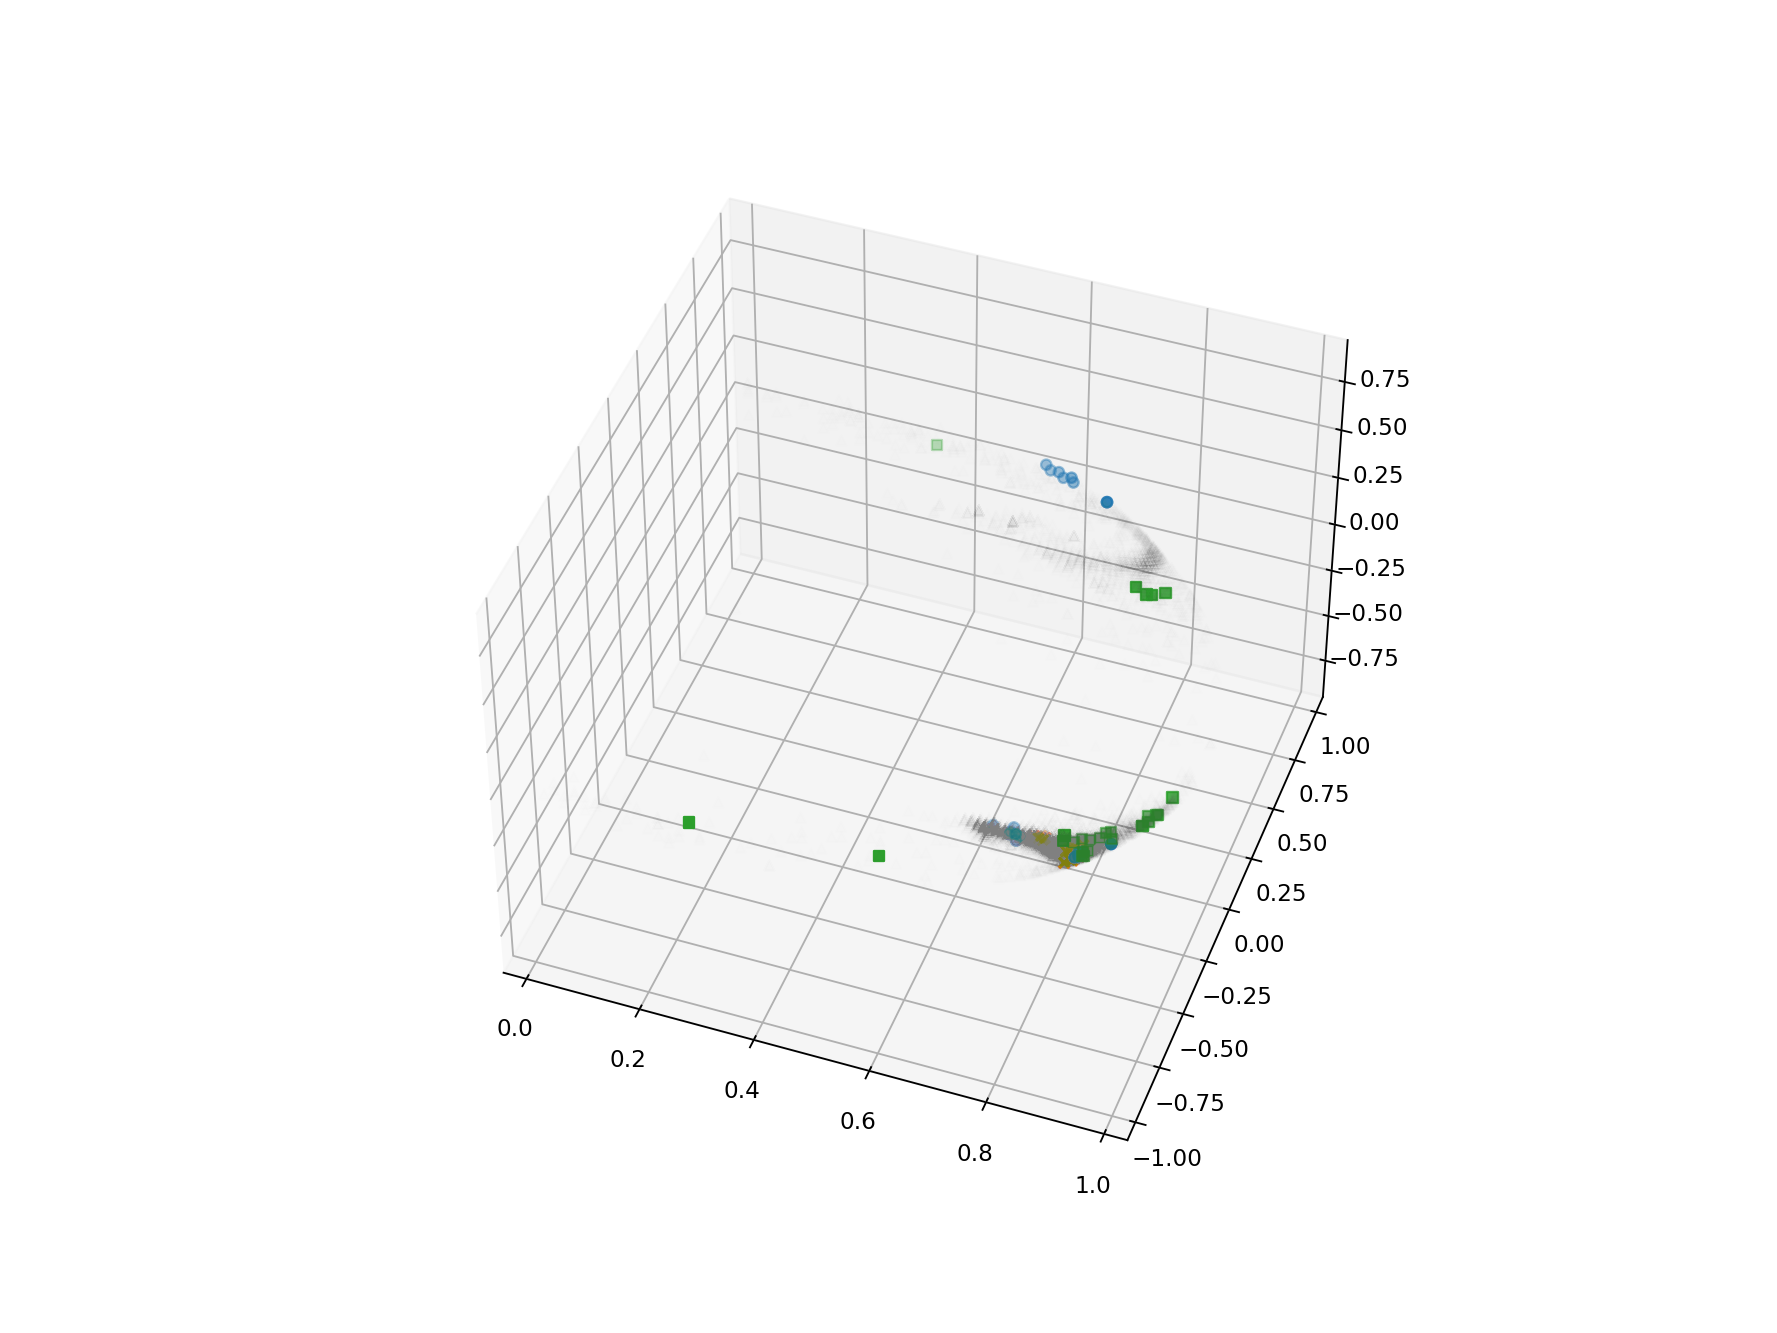

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(otherLeft[:,0], otherLeft[:,1], otherLeft[:,2], marker='o')
ax.scatter(tabletLeft[:,0], tabletLeft[:,1], tabletLeft[:,2], marker='x')
ax.scatter(robotLeft[:,0], robotLeft[:,1], robotLeft[:,2], marker='s')
ax.scatter(left[:,0], left[:,1], left[:,2], color='gray',marker='^', alpha=0.005)


<IPython.core.display.Javascript object>


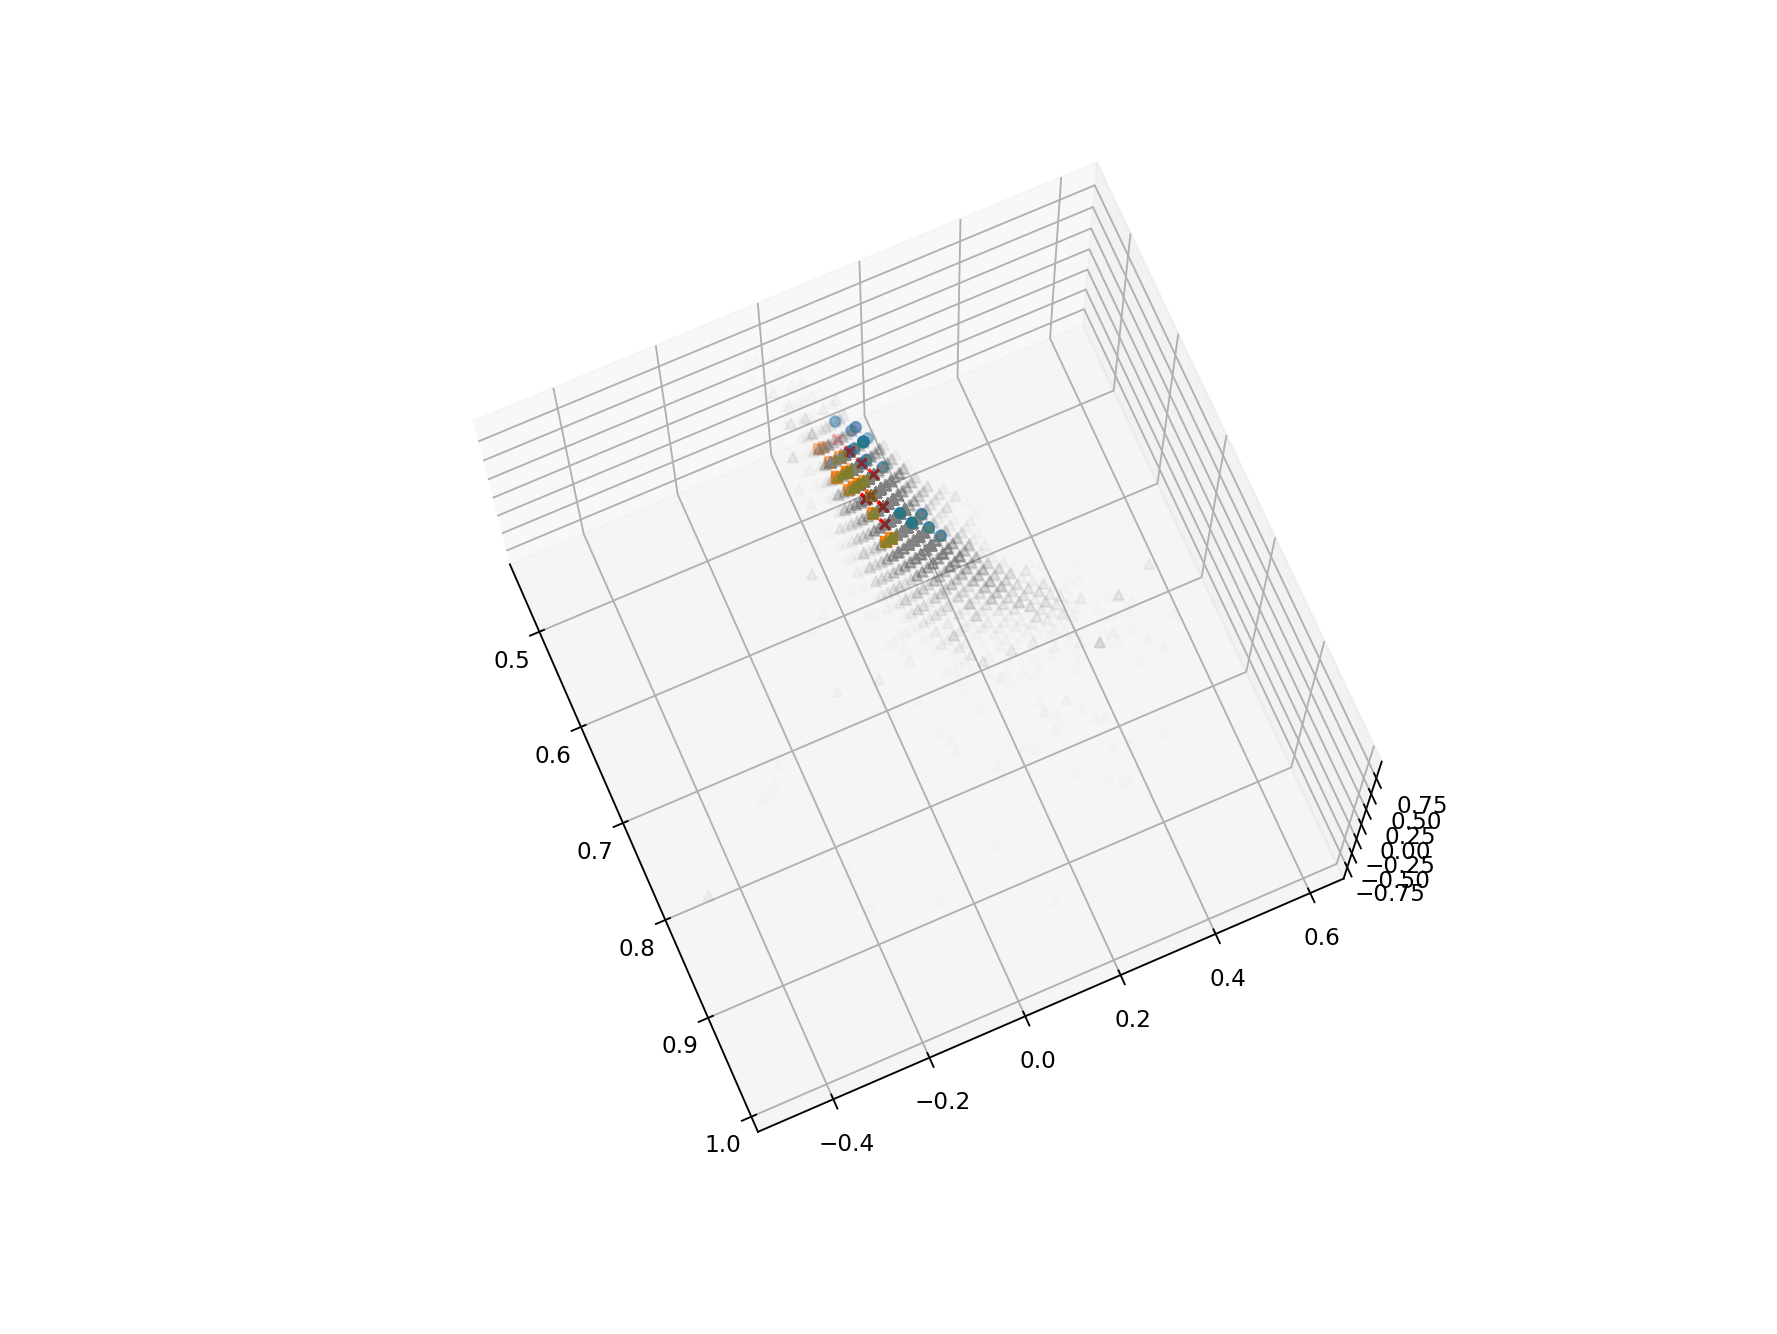

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(otherRight[:,0], otherRight[:,1], otherRight[:,2], marker='o')
ax.scatter(tabletRight[:,0], tabletRight[:,1], tabletRight[:,2], color='red',marker='x')
ax.scatter(robotRight[:,0], robotRight[:,1], robotRight[:,2], marker='s')
ax.scatter(right[:,0], right[:,1], right[:,2], color='gray',marker='^', alpha=0.01)